In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv('dataset.csv')
df1 = pd.read_csv('dataset.csv')
df.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


## Data Cleaning

In [6]:
# Rename Column
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')

In [7]:
# Feature selection
df.drop(df[['posted_on', 'area_locality', 'point_of_contact']],axis = 1, inplace = True)


In [8]:
# # Feature engineering
# df['floor'] = df['floor'].str.replace('Ground', '0')
# df['floor'] = df['floor'].str.replace('Upper Basement', '-1')
# df['floor'] = df['floor'].str.replace('Lower Basement', '-2')

# df[['floor', 'total_floor']] = df['floor'].str.extract(r'^(.*?)\s+out\s+of\s+(.*?)$')

In [9]:
# # NaN value from feature engineering
# df[pd.isnull(df).any(axis=1)]

In [10]:
# # Remove 4 missing row
# df.dropna(axis = 0, inplace = True)
# # Fix data type
# df[['floor', 'total_floor']] = df[['floor', 'total_floor']].astype('int64')

In [11]:
# Or... just delete it altogether
df.drop(columns='floor', inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   bhk                4746 non-null   int64 
 1   rent               4746 non-null   int64 
 2   size               4746 non-null   int64 
 3   area_type          4746 non-null   object
 4   city               4746 non-null   object
 5   furnishing_status  4746 non-null   object
 6   tenant_preferred   4746 non-null   object
 7   bathroom           4746 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 296.8+ KB


In [13]:
# Divide feature
catfeat = df.select_dtypes(include = 'object').columns.to_list()
numfeat = df.select_dtypes(include = 'number').columns.to_list()

## EDA

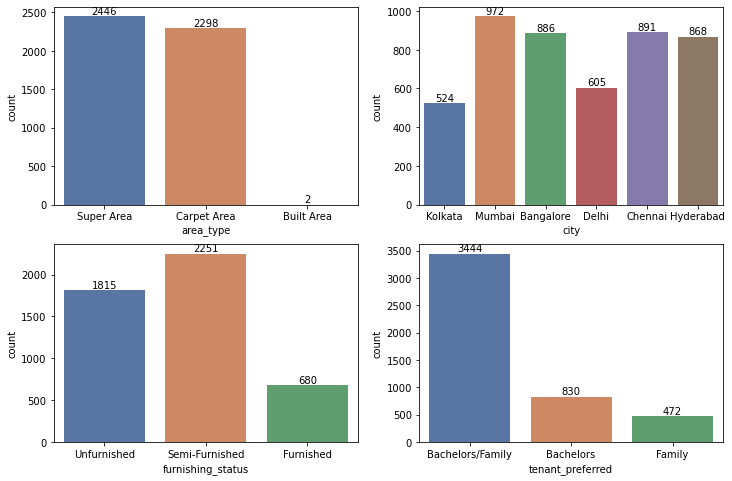

In [14]:
plt.figure(figsize = (12,8))

for i in catfeat :
    plt.subplot(2, 2, catfeat.index(i) + 1)
    ax = sns.countplot(data = df, x = df[i], palette='deep')
    ax.bar_label(ax.containers[0])

    
plt.show()

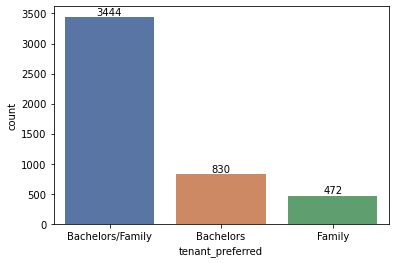

In [15]:
ax = sns.countplot(data = df, x = df['tenant_preferred'], palette='deep')
ax.bar_label(ax.containers[0])
plt.show()

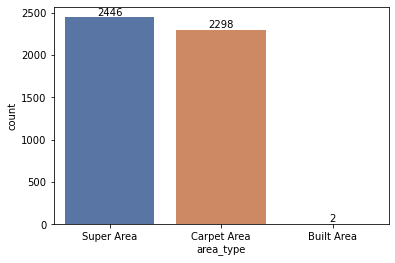

In [16]:
ax = sns.countplot(data = df, x = df['area_type'], palette='deep')
ax.bar_label(ax.containers[0])
plt.show()

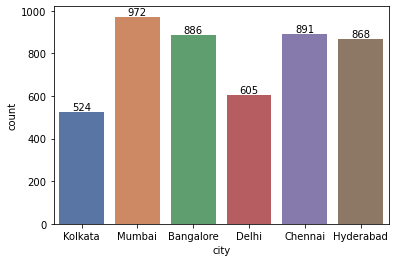

In [17]:
ax = sns.countplot(data = df, x = df['city'], palette='deep')
ax.bar_label(ax.containers[0])
plt.show()

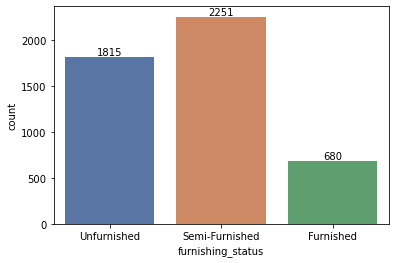

In [18]:
ax = sns.countplot(data = df, x = df['furnishing_status'], palette='deep')
ax.bar_label(ax.containers[0])
plt.show()

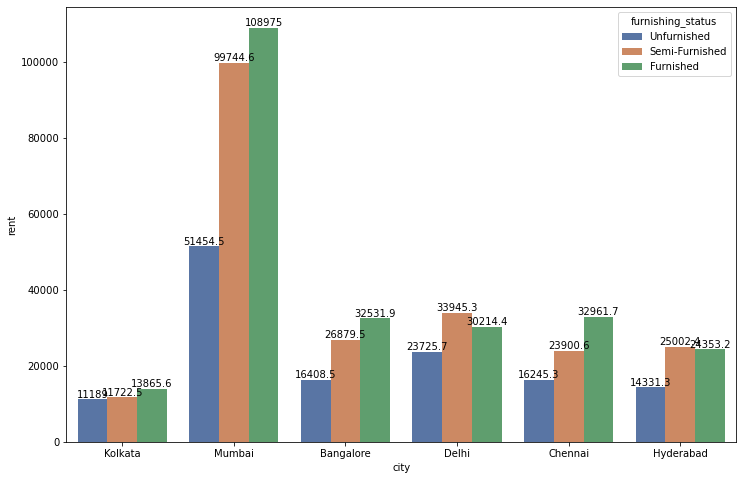

In [19]:
plt.figure(figsize = (12,8))
ax = sns.barplot(data = df, x = df['city'], y = df['rent'] ,hue = df['furnishing_status'], palette='deep', ci = 0)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()

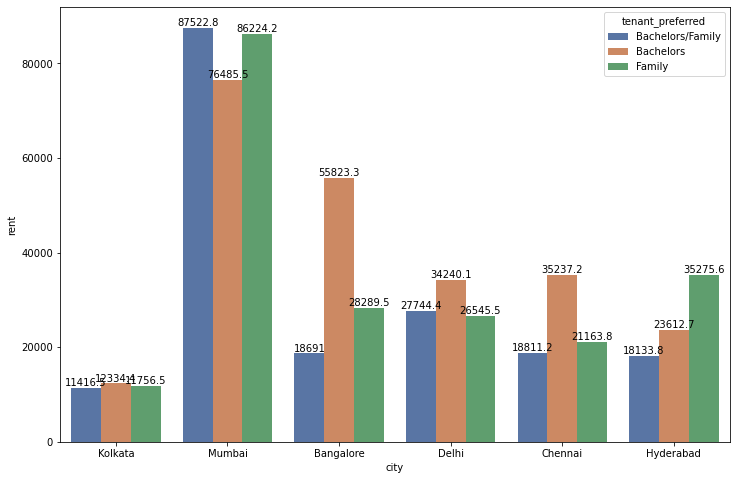

In [20]:
plt.figure(figsize = (12,8))
ax = sns.barplot(data = df, x = df['city'], y = df['rent'] ,hue = df['tenant_preferred'], palette='deep', ci = 0)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()

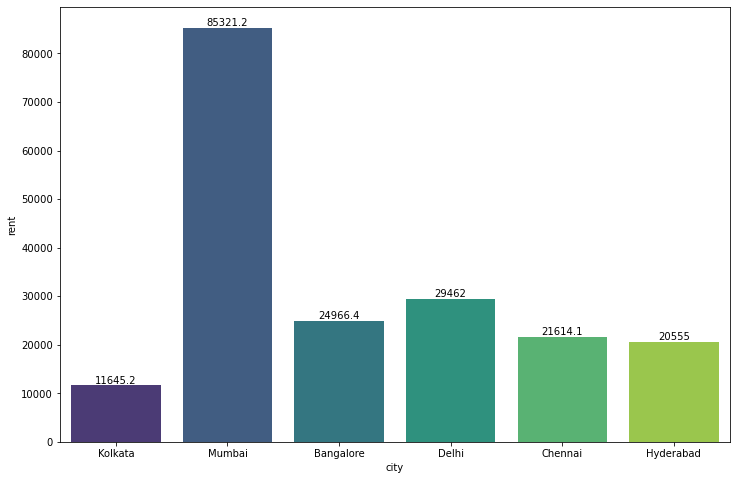

In [21]:
plt.figure(figsize = (12,8))
ax = sns.barplot(data = df, x = df['city'], y = df['rent'], palette='viridis', ci = 0)
ax.bar_label(ax.containers[0])
plt.show()

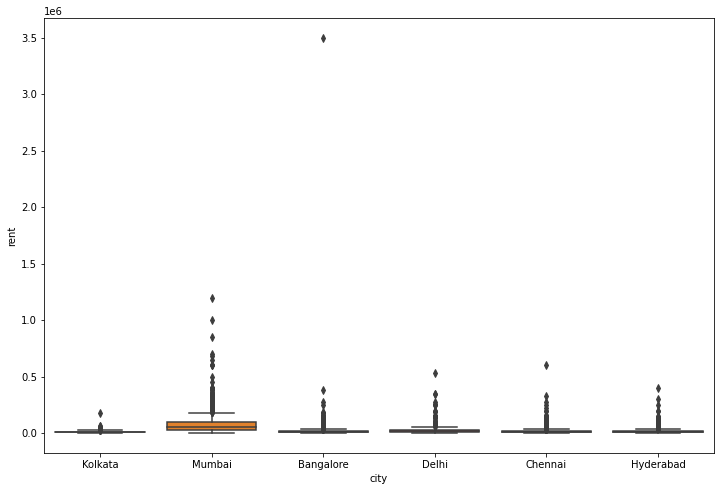

In [22]:
plt.figure(figsize = (12,8))
ax = sns.boxplot(x = df['city'], y = df['rent'])
plt.show()

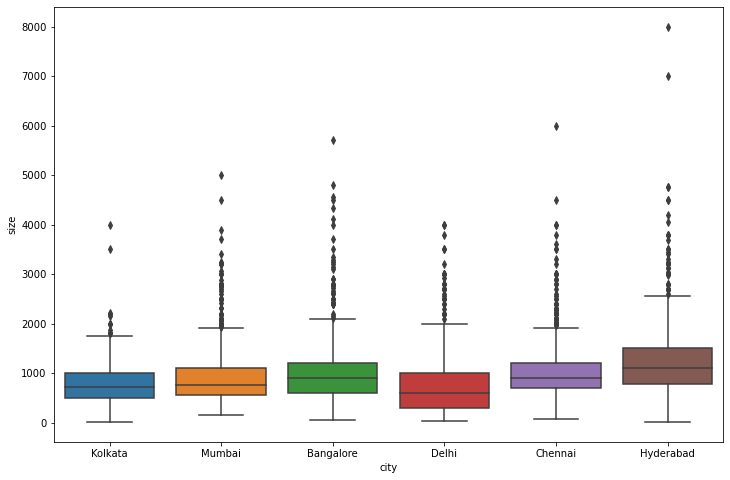

In [23]:
plt.figure(figsize = (12,8))
ax = sns.boxplot(x = df['city'], y = df['size'])
plt.show()

In [24]:
df[df['rent'] > 3000000]

,bhk,rent,size,area_type,city,furnishing_status,tenant_preferred,bathroom
1837,3,3500000,2500,Carpet Area,Bangalore,Semi-Furnished,Bachelors,3


In [25]:
# Remove outlier
df.drop(index=1837, inplace=True)

<AxesSubplot:xlabel='size', ylabel='Count'>

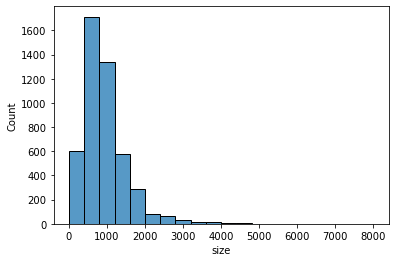

In [26]:
sns.histplot(df['size'], bins = 20)

<AxesSubplot:xlabel='city', ylabel='bhk'>

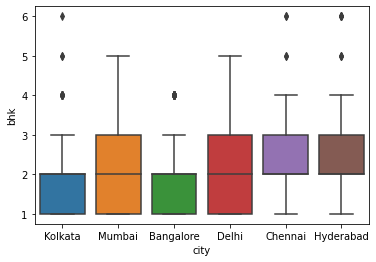

In [27]:
sns.boxplot(x = df['city'], y = df['bhk'])

<AxesSubplot:xlabel='city', ylabel='bathroom'>

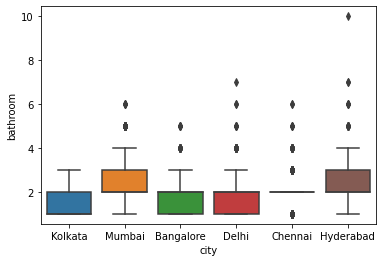

In [28]:
sns.boxplot(x = df['city'], y = df['bathroom'])

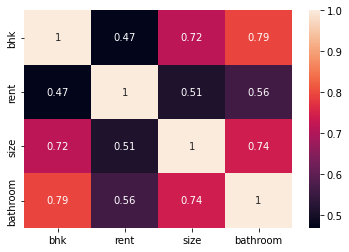

In [29]:
sns.heatmap(df.corr(),annot=True)
plt.show()

## Preprocessing

In [30]:
def oneh_encoding(df) :
    df_copy = df.copy()
    catcol = df_copy.select_dtypes('object').columns.to_list()
        
    df_copy = pd.get_dummies(df, columns = catcol)
    
    return df_copy

def label_encoder(df) :
    df_copy = df.copy()
    catcol = df_copy.select_dtypes('object').columns.to_list()
    
    LabelEncoding = LabelEncoder()
    
    for i in catcol :
        df_copy[i] = LabelEncoding.fit_transform(df_copy[i])

    return df_copy

In [31]:
X = df.drop(columns = 'rent')
y = df['rent']

In [32]:
# Normalization, because the data distribution isn't normal distribution
catfeat = X.select_dtypes(include = 'object').columns.to_list()
numfeat = X.select_dtypes(include = 'number').columns.to_list()

X_cat = X[catfeat]
X_num = X[numfeat]

scaler = MinMaxScaler()

scaler.fit(X_num)
X_num_scaled = scaler.transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns)

X_cat = oneh_encoding(X_cat)

X_cat = X_cat.reset_index(drop=True)
X_num_scaled = X_num_scaled.reset_index(drop=True)

X_scaled = pd.concat([X_num_scaled, X_cat], axis=1)

In [21]:
# Ver 2, label encoder
catfeat = X.select_dtypes(include = 'object').columns.to_list()
numfeat = X.select_dtypes(include = 'number').columns.to_list()

X_cat = X[catfeat]
X_num = X[numfeat]

scaler = MinMaxScaler()

scaler.fit(X_num)
X_num_scaled = scaler.transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns)

X_cat = label_encoder(X_cat)

X_cat = X_cat.reset_index(drop=True)
X_num_scaled = X_num_scaled.reset_index(drop=True)

X_scaled = pd.concat([X_num_scaled, X_cat], axis=1)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size = .3)

## Modeling

In [133]:
models = {
    'decision tree' : DecisionTreeRegressor(),
    'knn' : KNeighborsRegressor(),
    'xgboost' : XGBRegressor(),
    'random forest' : RandomForestRegressor(),
    'gradient boosting' : GradientBoostingRegressor()
}

In [154]:
results = {}
cv = KFold(n_splits= 10, shuffle = True)

for name, model in models.items():
    result = np.mean(cross_val_score(model, X_train, y_train, scoring = 'r2', cv= cv))
    results[name] = result

In [155]:
results_df = pd.DataFrame(results, index=range(0,1)).T.rename(columns={0: 'R2'}).sort_values('R2', ascending=False)
results_df.T

,gradient boosting,random forest,xgboost,knn,decision tree
R2,0.709005,0.651076,0.62081,0.585465,0.53779


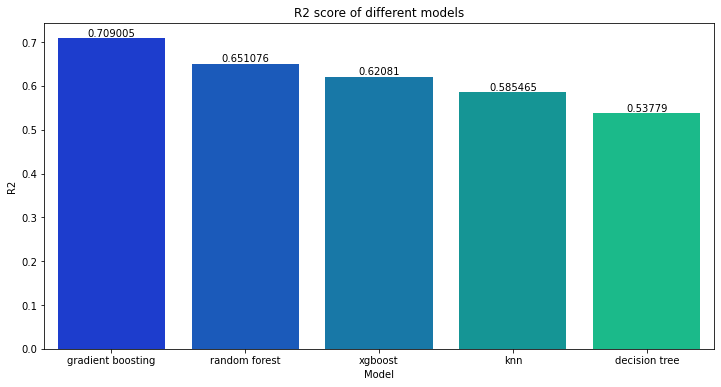

In [156]:
plt.figure(figsize = (12, 6))
ax = sns.barplot(x= results_df.index, y = results_df['R2'], palette = 'winter')
ax.bar_label(ax.containers[0])
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 score of different models')
plt.show()

In [157]:
results_mse = {}
cv = KFold(n_splits= 10, shuffle = True)

for name, model in models.items():
    result = np.mean(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv= cv))
    results_mse[name] = result

In [160]:
results_df = pd.DataFrame(results_mse, index=range(0,1)).T.rename(columns={0: 'MSE'}).sort_values('MSE', ascending=True)
results_df.T

,gradient boosting,random forest,xgboost,knn,decision tree
MSE,1.138006e+09,1.223063e+09,1.584205e+09,1.616212e+09,2.093067e+09


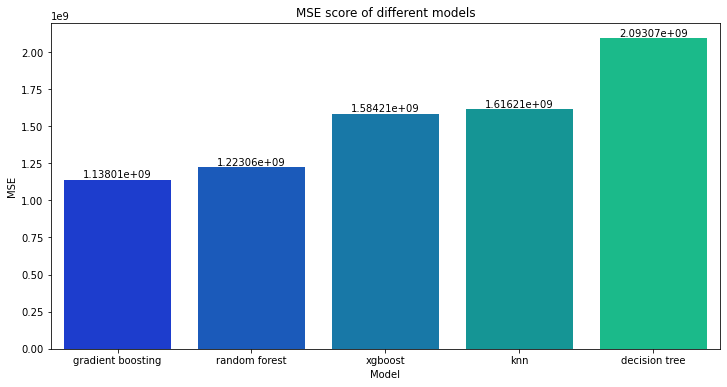

In [161]:
plt.figure(figsize = (12, 6))
ax = sns.barplot(x= results_df.index, y = results_df['MSE'], palette = 'winter')
ax.bar_label(ax.containers[0])
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE score of different models')
plt.show()

In [162]:
results_mae = {}
cv = KFold(n_splits= 10, shuffle = True)

for name, model in models.items():
    result = np.mean(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv= cv))
    results_mae[name] = result

In [164]:
results_df = pd.DataFrame(results_mae, index=range(0,1)).T.rename(columns={0: 'MAE'}).sort_values('MAE', ascending=True)
results_df.T

,gradient boosting,random forest,xgboost,knn,decision tree
MAE,12349.332754,12476.827969,14086.107617,14128.048048,15501.863187


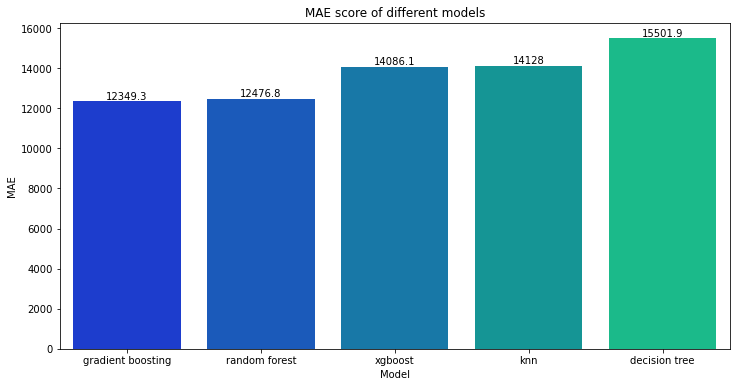

In [165]:
plt.figure(figsize = (12, 6))
ax = sns.barplot(x= results_df.index, y = results_df['MAE'], palette = 'winter')
ax.bar_label(ax.containers[0])
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('MAE score of different models')
plt.show()

In [140]:
def benchmark(model):
  lr = model
  lr.fit(X_train, y_train)

  y_train_pred = lr.predict(X_train)
  y_test_pred = lr.predict(X_test)

  print('For training data ---------')
  print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_train, y_train_pred)))
  print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_train, y_train_pred)))
  print("R2 Score: {:.2f} \n".format(r2_score(y_train, y_train_pred)))

  print('For testing data ---------')
  print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_test, y_test_pred)))
  print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_test, y_test_pred)))
  print("R2 Score: {:.2f} \n".format(r2_score(y_test, y_test_pred)))
  
  cv = KFold(n_splits = 10)
  print('Cross Validation K-Fold (10 fold) ---------')
  print("Mean Absolute Error: {:.2f}".format(np.mean(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv= cv))))
  print("Mean Squared Error: {:.2f}".format(np.mean(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv= cv))))
  print("R2 Score: {:.2f}".format(np.mean(cross_val_score(model, X_train, y_train, scoring = 'r2', cv= cv))))

In [145]:
benchmark(DecisionTreeRegressor())

For training data ---------
Mean Absolute Error: 1946.24
Mean Squared Error: 54668979.64
R2 Score: 0.99 

For testing data ---------
Mean Absolute Error: 16250.76
Mean Squared Error: 2156755670.49
R2 Score: 0.26 

Cross Validation K-Fold (10 fold) ---------
Mean Absolute Error: 15242.91
Mean Squared Error: 1910727664.29
R2 Score: 0.52


In [146]:
benchmark(KNeighborsRegressor())

For training data ---------
Mean Absolute Error: 11396.86
Mean Squared Error: 1029652569.45
R2 Score: 0.73 

For testing data ---------
Mean Absolute Error: 13689.96
Mean Squared Error: 1083475970.60
R2 Score: 0.63 

Cross Validation K-Fold (10 fold) ---------
Mean Absolute Error: 14138.18
Mean Squared Error: 1603604914.88
R2 Score: 0.60


In [147]:
benchmark(XGBRegressor())

For training data ---------
Mean Absolute Error: 5477.12
Mean Squared Error: 120909053.71
R2 Score: 0.97 

For testing data ---------
Mean Absolute Error: 13031.98
Mean Squared Error: 934812445.57
R2 Score: 0.68 

Cross Validation K-Fold (10 fold) ---------
Mean Absolute Error: 13190.44
Mean Squared Error: 1519642870.59
R2 Score: 0.59


In [148]:
benchmark(RandomForestRegressor())

For training data ---------
Mean Absolute Error: 5538.53
Mean Squared Error: 207043985.09
R2 Score: 0.95 

For testing data ---------
Mean Absolute Error: 12863.17
Mean Squared Error: 1063941215.16
R2 Score: 0.63 

Cross Validation K-Fold (10 fold) ---------
Mean Absolute Error: 12599.81
Mean Squared Error: 1195963463.97
R2 Score: 0.68


In [149]:
benchmark(GradientBoostingRegressor())

For training data ---------
Mean Absolute Error: 9896.03
Mean Squared Error: 495409231.86
R2 Score: 0.87 

For testing data ---------
Mean Absolute Error: 12432.12
Mean Squared Error: 926611208.51
R2 Score: 0.68 

Cross Validation K-Fold (10 fold) ---------
Mean Absolute Error: 11993.47
Mean Squared Error: 1136985355.89
R2 Score: 0.71
